In [1]:
import os
from pathlib import Path

import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as pn
rnd = np.random.default_rng()

In [2]:
def load(p):
    df = pd.read_csv(p)
    df['csv'] = str(p)
    return df

In [3]:
goblin_winrates, zombie_winrates, spider_winrates = numpy.empty(shape=4), numpy.empty(shape=4), numpy.empty(shape=4)
goblin_std, zombie_std, spider_std = numpy.empty(shape=4), numpy.empty(shape=4), numpy.empty(shape=4)
goblin_PA_ratio, zombie_PA_ratio, spider_PA_ratio = numpy.empty(shape=4), numpy.empty(shape=4), numpy.empty(shape=4)

Figure 1 : Survival chances according to different creatures

In [4]:
outputFolders = os.listdir('release')
for i in range(4):
    df = pd.concat([load(x) for x in Path().glob(f"release/1Fighter{i+1}Goblin/outcomes_*.csv") if x.stat().st_size > 1000], ignore_index=True)
    df.team = np.array(['PCs', 'monsters'])[df.team]
    wins = df.loc[(df['epoch'] >= 90) & (df['team'] == 'PCs')]
    goblin_winrates[i] = numpy.mean(wins.groupby('epoch')['team_win'].mean())
    goblin_std[i] = numpy.std(wins.groupby('epoch')['team_win'].mean())

    dfa = pd.concat([load(x) for x in Path().glob(f"release/1Fighter{i+1}Goblin/actions_*.csv") if x.stat().st_size > 1000], ignore_index=True)
    dfa_last10 = dfa[dfa['epoch'] >= 90]
    goblin_PA_ratio[i] = len(dfa_last10[dfa_last10['action'] == 'Greatsword Power Attack']) / len(dfa_last10[dfa_last10['action'] == 'Greatsword'])

for i in range(4):
    df = pd.concat([load(x) for x in Path().glob(f"release/1Fighter{i+1}Zombie/outcomes_*.csv") if x.stat().st_size > 1000], ignore_index=True)
    df.team = np.array(['PCs', 'monsters'])[df.team]
    wins = df.loc[(df['epoch'] >= 90) & (df['team'] == 'PCs')]
    zombie_winrates[i] = numpy.mean(wins.groupby('epoch')['team_win'].mean())
    zombie_std[i] = numpy.std(wins.groupby('epoch')['team_win'].mean())

    dfa = pd.concat([load(x) for x in Path().glob(f"release/1Fighter{i+1}Zombie/actions_*.csv") if x.stat().st_size > 1000], ignore_index=True)
    dfa_last10 = dfa[dfa['epoch'] >= 90]
    zombie_PA_ratio[i] = len(dfa_last10[dfa_last10['action'] == 'Greatsword Power Attack']) / len(dfa_last10[dfa_last10['action'] == 'Greatsword'])

for i in range(4):
    df = pd.concat([load(x) for x in Path().glob(f"release/1Fighter{i+1}Spider/outcomes_*.csv") if x.stat().st_size > 1000], ignore_index=True)
    df.team = np.array(['PCs', 'monsters'])[df.team]
    wins = df.loc[(df['epoch'] >= 90) & (df['team'] == 'PCs')]
    spider_winrates[i] = numpy.mean(wins.groupby('epoch')['team_win'].mean())
    spider_std[i] = numpy.std(wins.groupby('epoch')['team_win'].mean())

    dfa = pd.concat([load(x) for x in Path().glob(f"release/1Fighter{i+1}Spider/actions_*.csv") if x.stat().st_size > 1000], ignore_index=True)
    dfa_last10 = dfa[dfa['epoch'] >= 90]
    spider_PA_ratio[i] = len(dfa_last10[dfa_last10['action'] == 'Greatsword Power Attack']) / len(dfa_last10[dfa_last10['action'] == 'Greatsword'])

Figure 1 : Encounter Scaling

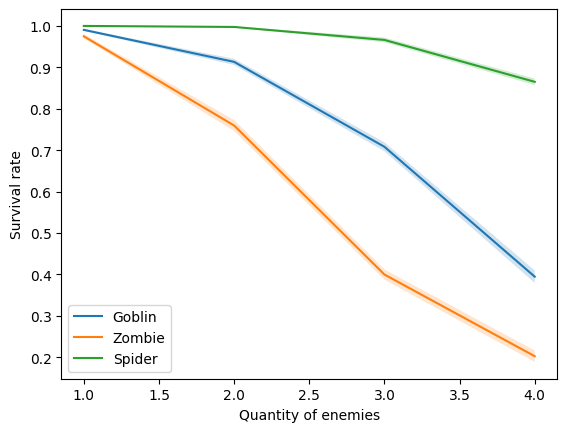

In [5]:
fig, ax = plt.subplots()
ax.plot(list(range(1, 5)), goblin_winrates, label='Goblin')
plt.fill_between(list(range(1, 5)), goblin_winrates+goblin_std, goblin_winrates-goblin_std, alpha=0.2)
ax.plot(list(range(1, 5)), zombie_winrates, label='Zombie')
plt.fill_between(list(range(1, 5)), zombie_winrates+zombie_std, zombie_winrates-zombie_std, alpha=0.2)
ax.plot(list(range(1, 5)), spider_winrates, label='Spider')
plt.fill_between(list(range(1, 5)), spider_winrates+spider_std, spider_winrates-spider_std, alpha=0.2)
plt.ylabel('Survival rate')
plt.xlabel('Quantity of enemies')
plt.legend()
plt.savefig('figures/figure1.png')
plt.show()

Figure 2 : Actions selected

In [11]:
dfa = pd.concat([load(x) for x in Path().glob(f"release/1Fighter1Zombie/actions_*.csv") if x.stat().st_size > 1000], ignore_index=True)

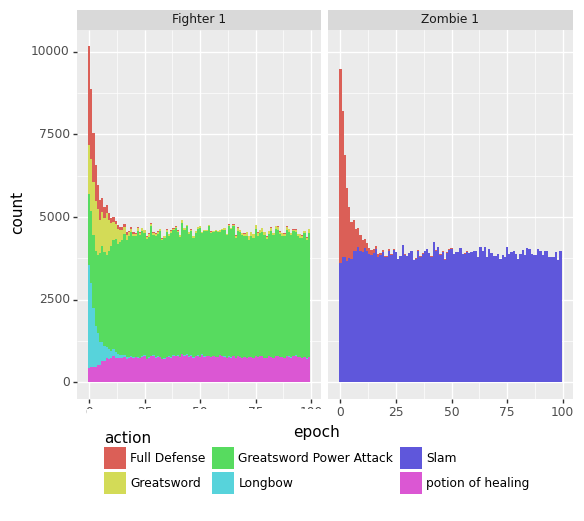

<ggplot: (162309431278)>

In [12]:
actionchoices_a = pn.qplot('epoch', data=dfa, fill='action', geom='histogram', binwidth=1) + pn.facet_wrap('actor') + pn.theme(legend_position='bottom', legend_direction='horizontal')
actionchoices_a

In [13]:
actionchoices_a.save('figures/figure2.png')

C:\Users\wlecl\PycharmProjects\PathfinderRL\pathfindervenv\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\wlecl\PycharmProjects\PathfinderRL\pathfindervenv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: figures/figure2.png


Fig 3 : Power attack chance proportion

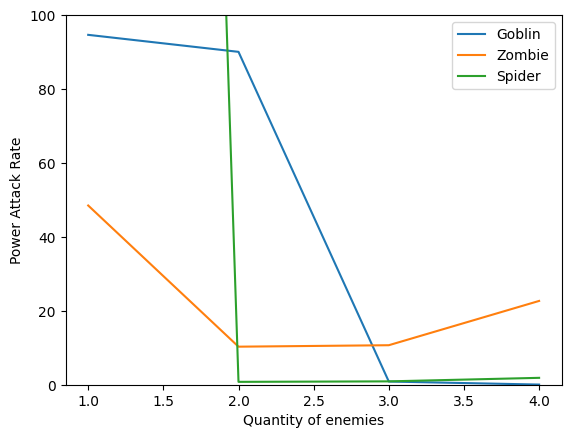

In [9]:
fig, ax = plt.subplots()
ax.plot(list(range(1, 5)), goblin_PA_ratio, label='Goblin')
ax.plot(list(range(1, 5)), zombie_PA_ratio, label='Zombie')
ax.plot(list(range(1, 5)), spider_PA_ratio, label='Spider')
plt.ylabel('Power Attack Rate')
plt.xlabel('Quantity of enemies')
plt.ylim(0, 100)
plt.legend()
plt.savefig('figures/figure3.png')
plt.show()

Figure 4 : Actions selected against Medusa

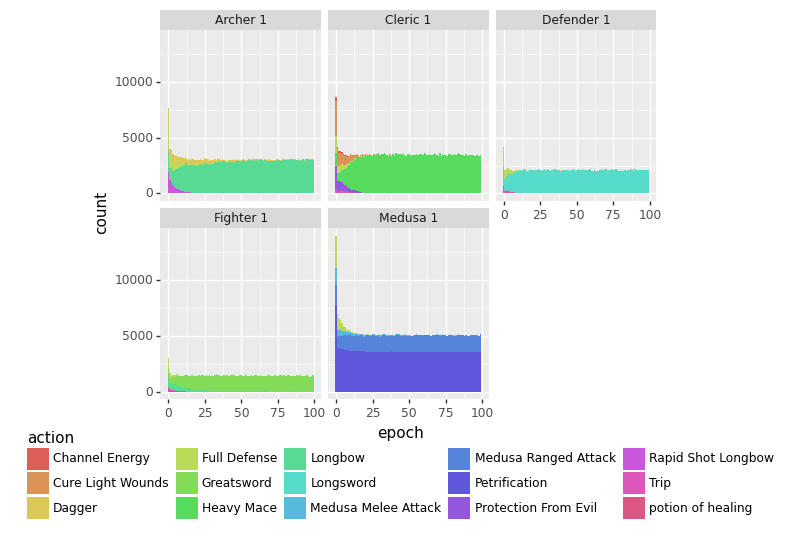

<ggplot: (162348398210)>

In [14]:
dfa = pd.concat([load(x) for x in Path().glob(f"output/vsMedusaNoStrat/actions_*.csv") if x.stat().st_size > 1000],
                ignore_index=True)
actionchoices = pn.qplot('epoch', data=dfa, fill='action', geom='histogram', binwidth=1) + pn.facet_wrap(
    'actor') + pn.theme(legend_position='bottom', legend_direction='horizontal')
actionchoices

In [17]:
actionchoices.save('figures/figure4.png')

C:\Users\wlecl\PycharmProjects\PathfinderRL\pathfindervenv\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\wlecl\PycharmProjects\PathfinderRL\pathfindervenv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: figures/figure4.png
